In [296]:
import pandas as pd
import datetime as dt
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
filename = 'data/Berlin-temps/TG_STAID002759.txt'

In [46]:
with open(filename, 'r', encoding='utf-8') as f:
    data_raw = f.read()

In [47]:
split_data = data_raw.splitlines()

In [51]:
split_data

['EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D), file created on 28-03-2022',
 'THESE DATA CAN BE USED FREELY PROVIDED THAT THE FOLLOWING SOURCE IS ACKNOWLEDGED:',
 '',
 'Klein Tank, A.M.G. and Coauthors, 2002. Daily dataset of 20th-century surface',
 'air temperature and precipitation series for the European Climate Assessment.',
 'Int. J. of Climatol., 22, 1441-1453.',
 'Data and metadata available at http://www.ecad.eu',
 '',
 'FILE FORMAT (MISSING VALUE CODE IS -9999):',
 '',
 '01-06 SOUID: Source identifier',
 '08-15 DATE : Date YYYYMMDD',
 '17-21 TG   : mean temperature in 0.1 &#176;C',
 "23-27 Q_TG : Quality code for TG (0='valid'; 1='suspect'; 9='missing')",
 '',
 'This is the blended series of station GERMANY, BERLIN-TEMPELHOF (STAID: 2759).',
 'Blended and updated with sources: 111448 127488 128124 ',
 'See file sources.txt and stations.txt for more info.',
 '',
 ' SOUID,    DATE,   TG, Q_TG',
 '127488,18760101,   22,    0',
 '127488,18760102,   25,    0',
 '127488,18760103, 

In [52]:
for i in range(len(split_data)):
    if 'SOUID' in split_data[i]:
        print(i, split_data[i])

10 01-06 SOUID: Source identifier
19  SOUID,    DATE,   TG, Q_TG


In [54]:
data_extracted = split_data[19:]
data_extracted

[' SOUID,    DATE,   TG, Q_TG',
 '127488,18760101,   22,    0',
 '127488,18760102,   25,    0',
 '127488,18760103,    3,    0',
 '127488,18760104,  -58,    0',
 '127488,18760105,  -98,    0',
 '127488,18760106,  -77,    0',
 '127488,18760107,  -66,    0',
 '127488,18760108,  -89,    0',
 '127488,18760109, -127,    0',
 '127488,18760110,  -89,    0',
 '127488,18760111,  -62,    0',
 '127488,18760112,  -46,    0',
 '127488,18760113,  -35,    0',
 '127488,18760114,  -36,    0',
 '127488,18760115,  -31,    0',
 '127488,18760116,  -23,    0',
 '127488,18760117,  -12,    0',
 '127488,18760118,    8,    0',
 '127488,18760119,   38,    0',
 '127488,18760120,   33,    0',
 '127488,18760121,   39,    0',
 '127488,18760122,   10,    0',
 '127488,18760123,    6,    0',
 '127488,18760124,   25,    0',
 '127488,18760125,   28,    0',
 '127488,18760126,    3,    0',
 '127488,18760127,   -8,    0',
 '127488,18760128,  -22,    0',
 '127488,18760129,  -13,    0',
 '127488,18760130,    7,    0',
 '127488

## Extract Headers

In [84]:
data_extracted_headers = data_extracted[0]
data_extracted_headers = data_extracted_headers.split(',')
data_extracted_headers = [i.replace(' ', '').lower() for i in data_extracted_headers]
data_extracted_headers

['souid', 'date', 'tg', 'q_tg']

## Extract and prepare temp values

In [80]:
data_extracted_values = data_extracted[1:]
data_extracted_values = [i.split(',') for i in data_extracted_values]
data_extracted_values

[['127488', '18760101', '   22', '    0'],
 ['127488', '18760102', '   25', '    0'],
 ['127488', '18760103', '    3', '    0'],
 ['127488', '18760104', '  -58', '    0'],
 ['127488', '18760105', '  -98', '    0'],
 ['127488', '18760106', '  -77', '    0'],
 ['127488', '18760107', '  -66', '    0'],
 ['127488', '18760108', '  -89', '    0'],
 ['127488', '18760109', ' -127', '    0'],
 ['127488', '18760110', '  -89', '    0'],
 ['127488', '18760111', '  -62', '    0'],
 ['127488', '18760112', '  -46', '    0'],
 ['127488', '18760113', '  -35', '    0'],
 ['127488', '18760114', '  -36', '    0'],
 ['127488', '18760115', '  -31', '    0'],
 ['127488', '18760116', '  -23', '    0'],
 ['127488', '18760117', '  -12', '    0'],
 ['127488', '18760118', '    8', '    0'],
 ['127488', '18760119', '   38', '    0'],
 ['127488', '18760120', '   33', '    0'],
 ['127488', '18760121', '   39', '    0'],
 ['127488', '18760122', '   10', '    0'],
 ['127488', '18760123', '    6', '    0'],
 ['127488',

## Create dataframe from temp data

In [185]:
berlin_temp_df = pd.DataFrame(data_extracted_values, columns=data_extracted_headers)

## Feature Engineering

1. Break out date into year, month, day
2. Create a temperature column (tg_clean) which is = tg * 0.1
3. Calculate monthly averages to fill in missing temperature data

#### 1. Break out date into year, month, day, season

In [331]:
def add_season(month):
    seasons = {'winter': [12, 1, 2],
          'spring': [3, 4, 5],
          'summer': [6, 7, 8],
          'autumn': [9, 10, 11]}
    
    for k,v in seasons.items():
        if month in v:
            return k

In [392]:
berlin_temp_df['date'] = pd.to_datetime(berlin_temp_df['date'], dayfirst=True)
berlin_temp_df['year'] = berlin_temp_df.date.dt.year
berlin_temp_df['month'] = berlin_temp_df.date.dt.month
berlin_temp_df['day'] = berlin_temp_df.date.dt.day
berlin_temp_df['season'] = berlin_temp_df.month.apply(add_season)

In [393]:
berlin_temp_df[['tg', 'q_tg']] = berlin_temp_df[['tg', 'q_tg']].apply(pd.to_numeric)

#### Create a temperature column (tg_clean) which is = tg * 0.1

In [394]:
berlin_temp_df['tg_clean'] = berlin_temp_df.tg * 0.1


#### 3. Calculate monthly averages to fill in missing temperature data

In [189]:
monthly_averages = berlin_temp_df.loc[berlin_temp_df.tg_clean.abs() < 999].groupby('month')['tg_clean'].mean()


#### Create table of seasonal averages

In [372]:
seasonal_averages = berlin_temp_df.loc[berlin_temp_df.tg_clean.abs() < 999].groupby(['year', 'season'])['tg_clean'].mean()
seasonal_averages = seasonal_averages.reset_index()
seasonal_averages

,year,season,tg_clean
0,1876,autumn,9.287912
1,1876,spring,8.340217
2,1876,summer,19.116304
3,1876,winter,0.439560
4,1877,autumn,9.354945
...,...,...,...
579,2021,autumn,11.316484
580,2021,spring,8.502174
581,2021,summer,20.283696
582,2021,winter,1.690000


In [358]:
seasonal_avg_vals = seasonal_averages.groupby('season')['tg_clean'].mean()
seasonal_avg_vals

season
autumn     9.488181
spring     8.976761
summer    18.223726
winter     0.787209
Name: tg_clean, dtype: float64

In [346]:
seasonal_averages_pivot = seasonal_averages.pivot(columns='season',            # <=== column(s) whose values we want as our new columns
                     index='year',           # <=== column to use as our new index
                     values='tg_clean').reset_index()  # <=== column whose values we want to populate our new wide dataframe

In [370]:
seasonal_averages_pivot = seasonal_averages_pivot.dropna()
seasonal_averages_pivot

season,year,autumn,spring,summer,winter
0,1876,9.287912,8.340217,19.116304,0.439560
1,1877,9.354945,7.160870,19.427174,2.814444
2,1878,10.797802,9.695652,18.010870,2.275556
3,1879,9.089011,7.372826,18.107609,-2.060000
4,1880,9.750549,9.209783,18.693478,1.475824
...,...,...,...,...,...
141,2017,10.878022,10.723913,19.216304,1.838889
142,2018,11.534066,11.300000,21.315217,2.673333
143,2019,11.313187,10.555435,21.476087,3.772222
144,2020,11.748352,9.998913,20.321739,4.769231


Text(0, 0.5, 'Avg Temp')

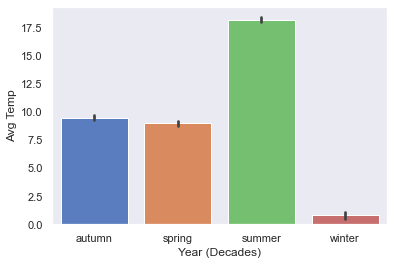

In [390]:
sns.set_theme(style='dark', palette='muted')
sns.barplot(data=seasonal_averages, x='season', y='tg_clean')
plt.xlabel('Year (Decades)')
plt.ylabel('Avg Temp')

In [203]:
def null_fill(x_row):
    """_summary_
        Calculate monthly averages to fill in missing temperature data
    Returns:
        _type_: _description_
        Dataframe: Dataframe Raw
    """
    
    if abs(x_row.tg_clean) >= 999:
        x_row.tg_clean = monthly_averages[x_row['month']]
        return x_row
    else:
        return x_row
    
    

In [395]:
berlin_temp_df_nonull = berlin_temp_df.apply(null_fill, axis=1)

In [396]:
berlin_temp_df_nonull

,souid,date,tg,q_tg,year,month,day,tg_clean,season
0,127488,1876-01-01,22,0,1876,1,1,2.2,winter
1,127488,1876-01-02,25,0,1876,1,2,2.5,winter
2,127488,1876-01-03,3,0,1876,1,3,0.3,winter
3,127488,1876-01-04,-58,0,1876,1,4,-5.8,winter
4,127488,1876-01-05,-98,0,1876,1,5,-9.8,winter
...,...,...,...,...,...,...,...,...,...
53380,111448,2022-02-24,59,0,2022,2,24,5.9,winter
53381,111448,2022-02-25,44,0,2022,2,25,4.4,winter
53382,111448,2022-02-26,41,0,2022,2,26,4.1,winter
53383,111448,2022-02-27,5,0,2022,2,27,0.5,winter


#### Add decade grouping

In [397]:
berlin_temp_df_nonull['year_group'] = berlin_temp_df_nonull.year.apply(lambda x: math.floor(x/10) *10)

### Monthly average temperatures

In [316]:
berlin_temp_avg = berlin_temp_df_nonull.groupby(['month'])['tg_clean'].agg('mean')

In [317]:
berlin_temp_avg = pd.DataFrame(berlin_temp_avg)
#berlin_temp_avg = berlin_temp_avg.transpose().reset_index()

In [319]:
berlin_temp_avg.reset_index()

,month,tg_clean
0,1,0.019816
1,2,0.975217
2,3,4.181264
3,4,8.851920
4,5,13.935884
5,6,17.336897
6,7,19.025673
7,8,18.280000
8,9,14.503724
9,10,9.502536


### Plotting current tables

Text(0, 0.5, 'Avg Temp')

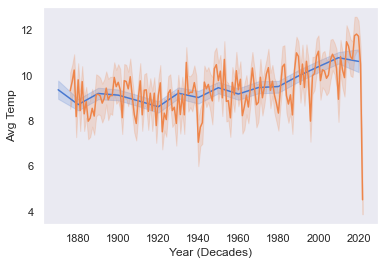

In [425]:
sns.set_theme(style='dark', palette='muted')
sns.lineplot(data=berlin_temp_df_nonull, x='year_group', y='tg_clean')
sns.lineplot(data=berlin_temp_df_nonull, x='year', y='tg_clean')
plt.xlabel('Year (Decades)')
plt.ylabel('Avg Temp')

Text(0, 0.5, 'Avg Temp')

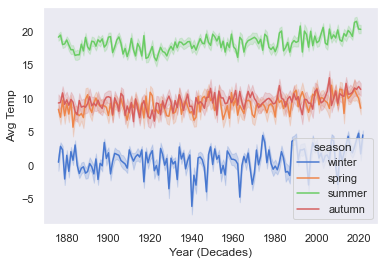

In [399]:
sns.set_theme(style='dark', palette='muted')
sns.lineplot(data=berlin_temp_df_nonull, x='year', y='tg_clean',hue='season')
plt.xlabel('Year (Decades)')
plt.ylabel('Avg Temp')

### Dataframe names
1. ```berlin_temp_df_nonull``` - features added, no null values
2. ```berlin_temp_avg``` - groupby monthly average temps
3. ```seasonal_averages_pivot``` - seasonal averages temps
4. ```berlin_temp_df``` - features add, some null values

In [426]:
berlin_temp_df_nonull['time_step'] = list(range(len(berlin_temp_df_nonull)))

In [430]:
from sklearn.linear_model import LinearRegression

In [463]:
berlin_temp_df_nonull = berlin_temp_df_nonull.set_index('date')

#### Drop the 29th of February

In [557]:
feb_29 = berlin_temp_df_nonull[(berlin_temp_df_nonull.month == 2) & (berlin_temp_df_nonull.day == 29)]

,souid,tg,q_tg,year,month,day,tg_clean,season,year_group,time_step,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend + seasonal,remainder
date,,,,,,,,,,,,,,,,,,,,,
1876-02-29,127488,21,0,1876,2,29,2.1,winter,1870,59,...,0,0,0,0,0,0,0,0,0.089022,2.010978
1880-02-29,127488,70,0,1880,2,29,7.0,winter,1880,1520,...,0,0,0,0,0,0,0,0,0.137605,6.862395
1884-02-29,127488,8,0,1884,2,29,0.8,winter,1880,2981,...,0,0,0,0,0,0,0,0,0.186189,0.613811
1888-02-29,127488,-62,0,1888,2,29,-6.2,winter,1880,4442,...,0,0,0,0,0,0,0,0,0.234773,-6.434773
1892-02-29,127488,16,0,1892,2,29,1.6,winter,1890,5903,...,0,0,0,0,0,0,0,0,0.283356,1.316644
1896-02-29,127488,-7,0,1896,2,29,-0.7,winter,1890,7364,...,0,0,0,0,0,0,0,0,0.331940,-1.031940
1904-02-29,127488,-32,0,1904,2,29,-3.2,winter,1900,10285,...,0,0,0,0,0,0,0,0,0.429074,-3.629074
1908-02-29,127488,29,0,1908,2,29,2.9,winter,1900,11746,...,0,0,0,0,0,0,0,0,0.477658,2.422342
1912-02-29,127488,108,0,1912,2,29,10.8,winter,1910,13207,...,0,0,0,0,0,0,0,0,0.526242,10.273758


In [562]:
berlin_temp_df_nonull = berlin_temp_df_nonull.drop(feb_29.index)

### Model the Trend

In [563]:
X = berlin_temp_df_nonull[['time_step']]
y = berlin_temp_df_nonull['tg_clean']

In [564]:
m = LinearRegression()

In [565]:
X.shape, y.shape

((53349, 1), (53349,))

In [566]:
m.fit(X,y)

LinearRegression()

In [567]:
berlin_temp_df_nonull['trend'] = m.predict(X)

<AxesSubplot:xlabel='year', ylabel='tg_clean'>

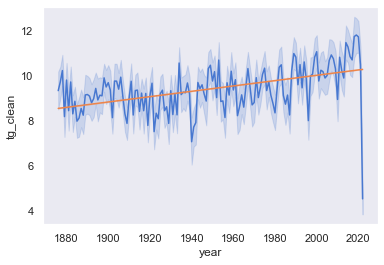

In [572]:
sns.lineplot(data=berlin_temp_df_nonull, x='year', y='tg_clean')
sns.lineplot(data=berlin_temp_df_nonull, x='year', y='trend')

### Plot without trend

In [573]:
berlin_temp_df_nonull['wo_trend'] = berlin_temp_df_nonull['tg_clean']  - berlin_temp_df_nonull['trend']

<AxesSubplot:xlabel='year', ylabel='wo_trend'>

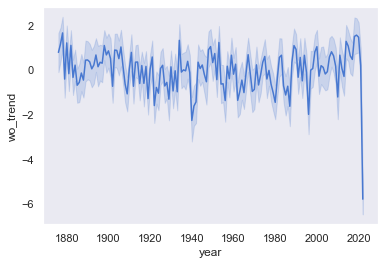

In [577]:
sns.lineplot(data=berlin_temp_df_nonull, x='year', y='wo_trend')
#sns.lineplot(data=berlin_temp_df_nonull, x='year', y='trend')

### Modeling Daily temps

In [589]:
day_dummies = pd.get_dummies(berlin_temp_df_nonull.day,
                                  prefix='day',
                                  drop_first=True).set_index(berlin_temp_df_nonull.index)

b_temp_daily_dummies = berlin_temp_df_nonull.join(day_dummies)

In [590]:
b_temp_daily_dummies.head()

,souid,tg,q_tg,year,month,day,tg_clean,season,year_group,time_step,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
date,,,,,,,,,,,,,,,,,,,,,
1876-01-01,127488,22,0,1876,1,1,2.2,winter,1870,0,...,0,0,0,0,0,0,0,0,0,0
1876-01-02,127488,25,0,1876,1,2,2.5,winter,1870,1,...,0,0,0,0,0,0,0,0,0,0
1876-01-03,127488,3,0,1876,1,3,0.3,winter,1870,2,...,0,0,0,0,0,0,0,0,0,0
1876-01-04,127488,-58,0,1876,1,4,-5.8,winter,1870,3,...,0,0,0,0,0,0,0,0,0,0
1876-01-05,127488,-98,0,1876,1,5,-9.8,winter,1870,4,...,0,0,0,0,0,0,0,0,0,0


In [591]:
X_daily = b_temp_daily_dummies.drop(columns=['souid','tg','q_tg', 'year','month','day', 'tg_clean', 'season', 'year_group', 'trend', 'wo_trend'])

In [592]:
m_daily = LinearRegression()

In [593]:
m_daily.fit(X_daily,y)

LinearRegression()

In [594]:
b_temp_daily_dummies['trend +daily'] = m_daily.predict(X_daily)

<AxesSubplot:xlabel='day', ylabel='tg_clean'>

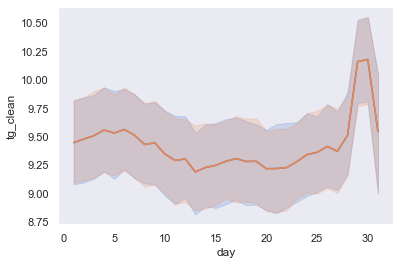

In [596]:
sns.lineplot(data=b_temp_daily_dummies, x='day', y='tg_clean')
sns.lineplot(data=b_temp_daily_dummies, x='day', y='trend +daily')

### Modeling Seasonality

In [578]:
seasonal_dummies = pd.get_dummies(berlin_temp_df_nonull.month,
                                  prefix='month',
                                  drop_first=True).set_index(berlin_temp_df_nonull.index)



berlin_temp_df_nonull = berlin_temp_df_nonull.join(seasonal_dummies)

ValueError: columns overlap but no suffix specified: Index(['month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [487]:
berlin_temp_df_nonull

,souid,tg,q_tg,year,month,day,tg_clean,season,year_group,time_step,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,,,,,,,
1876-01-01,127488,22,0,1876,1,1,2.2,winter,1870,0,...,0,0,0,0,0,0,0,0,0,0
1876-01-02,127488,25,0,1876,1,2,2.5,winter,1870,1,...,0,0,0,0,0,0,0,0,0,0
1876-01-03,127488,3,0,1876,1,3,0.3,winter,1870,2,...,0,0,0,0,0,0,0,0,0,0
1876-01-04,127488,-58,0,1876,1,4,-5.8,winter,1870,3,...,0,0,0,0,0,0,0,0,0,0
1876-01-05,127488,-98,0,1876,1,5,-9.8,winter,1870,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,111448,59,0,2022,2,24,5.9,winter,2020,53380,...,0,0,0,0,0,0,0,0,0,0
2022-02-25,111448,44,0,2022,2,25,4.4,winter,2020,53381,...,0,0,0,0,0,0,0,0,0,0
2022-02-26,111448,41,0,2022,2,26,4.1,winter,2020,53382,...,0,0,0,0,0,0,0,0,0,0


In [488]:
X = berlin_temp_df_nonull.drop(columns=['souid','tg','q_tg', 'year','month','day', 'tg_clean', 'season', 'year_group', 'trend', 'wo_trend'])

In [489]:
m_1 = LinearRegression()

In [490]:
m_1.fit(X,y)

LinearRegression()

In [494]:
berlin_temp_df_nonull['trend + seasonal'] = m_1.predict(X)

<AxesSubplot:xlabel='year', ylabel='tg_clean'>

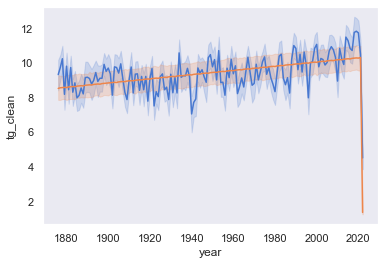

In [504]:
sns.lineplot(data=berlin_temp_df_nonull, x='year', y='tg_clean')
sns.lineplot(data=berlin_temp_df_nonull, x='year', y='trend + seasonal')

In [523]:
berlin_temp_df_nonull['remainder'] = berlin_temp_df_nonull['tg_clean'] - berlin_temp_df_nonull['trend + seasonal']

new_df = berlin_temp_df_nonull['remainder'] > 1
new_df.reset_index()

,date,remainder
0,1876-01-01,True
1,1876-01-02,True
2,1876-01-03,True
3,1876-01-04,False
4,1876-01-05,False
...,...,...
53380,2022-02-24,True
53381,2022-02-25,True
53382,2022-02-26,True
53383,2022-02-27,False


<AxesSubplot:xlabel='year', ylabel='remainder'>

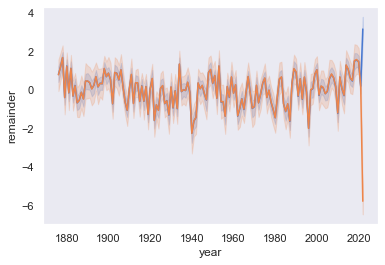

In [510]:
sns.lineplot(data=berlin_temp_df_nonull, x='year', y='remainder')
sns.lineplot(data=berlin_temp_df_nonull, x='year', y='wo_trend')

In [506]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [511]:
sd = seasonal_decompose(berlin_temp_df_nonull['tg_clean'], model='multiplicative')

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

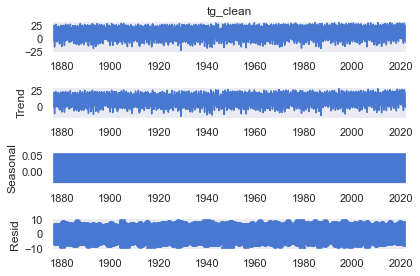

In [508]:
sd.plot()
None